In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('Titanic-Dataset.csv')

# Check basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [2]:
# Check for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Fill missing numerical values with mean
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Fill missing categorical values with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_16392\3329220303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_16392\3329220303.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
# Convert 'Sex' feature into numerical
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# One-hot encoding for 'Embarked' feature
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Standardizing 'Age' and 'Fare' columns
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])


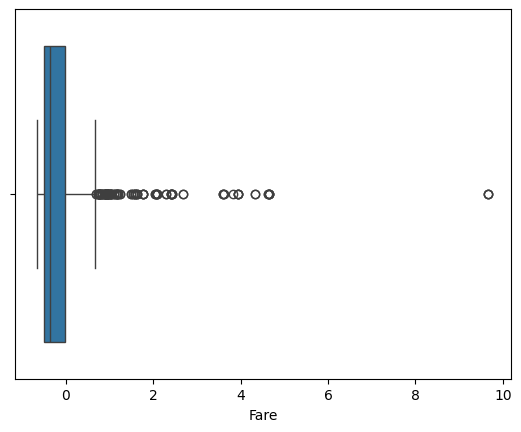

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize 'Fare' outliers
sns.boxplot(x=data['Fare'])
plt.show()

# Remove outliers
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]


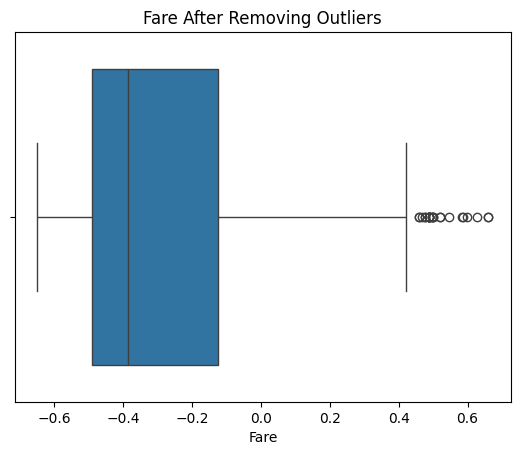

In [8]:
# Visualize 'Fare' after removing outliers
sns.boxplot(x=data['Fare'])
plt.title('Fare After Removing Outliers')
plt.show()


In [10]:
print("Final dataset shape:", data.shape)
# Final dataset
data.head()

Final dataset shape: (775, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,1,0,A/5 21171,-0.502445,NaN,False,True
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,1,0,113803,0.420730,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,0,0,373450,-0.486337,NaN,False,True
5,6,0,3,"Moran, Mr. James",1,0.000000,0,0,330877,-0.478116,NaN,True,False
